In [43]:
from data_gen import DataGenerator, get_data, real_u1
from pinn import PINNModel, model1, model2, optm1

from accuracy import AccuracyCalc
from plotting import NNPlots

import os

In [44]:
data = get_data(False)
koefs_list = data['big_range'][10:]
session = 3

model = PINNModel(model1(), optm=optm1())
dg = DataGenerator(data['x'], data['y'], model.predict, real_u1)

In [45]:
existing_koefs = []
mse_loss_record = []
max_loss_record = []
for koef in koefs_list:
    # print(DataGenerator.name(koef, session))
    if os.path.exists(DataGenerator.name(koef, session)):
        model.load(dg.name(koef, session))

        acc = AccuracyCalc(dg, (70, 70))
        existing_koefs.append(koef)
        max_loss_record.append(acc.maxe())
        mse_loss_record.append(acc.mse())
        print(f'mse_loss: {mse_loss_record[-1]}')
        print(f'max_loss: {max_loss_record[-1]}')
        print()

/home/arnautov/projectPractice/pinn_puasson/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 25 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
mse_loss: 7.975235138545137e-06
max_loss: 0.01277737133204937

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
mse_loss: 9.779847509640755e-06
max_loss: 0.0137120820581913

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
mse_loss: 8.156108620225413e-06
max_loss: 0.014593221247196198

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
mse_loss: 8.390685854637302e-06
max_loss: 0.013667779043316841

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
mse_loss: 8.323468725305675e-06
max_loss: 0.013510139659047127

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
mse_loss: 8.967871418852315e-06
max_loss: 0.012579722329974174

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
mse_loss: 8.354269855157668e-06
max_loss: 0.0134914331138134

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
mse_loss: 8.651805074088372e-06
max_loss: 0.014103015884757042

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step
mse_loss: 8.472452399115116e-06
max_loss: 0.013291409239172935

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
m

In [46]:
import numpy as np

print(list(np.linspace(1, 1000, 112)))

[1.0, 10.0, 19.0, 28.0, 37.0, 46.0, 55.0, 64.0, 73.0, 82.0, 91.0, 100.0, 109.0, 118.0, 127.0, 136.0, 145.0, 154.0, 163.0, 172.0, 181.0, 190.0, 199.0, 208.0, 217.0, 226.0, 235.0, 244.0, 253.0, 262.0, 271.0, 280.0, 289.0, 298.0, 307.0, 316.0, 325.0, 334.0, 343.0, 352.0, 361.0, 370.0, 379.0, 388.0, 397.0, 406.0, 415.0, 424.0, 433.0, 442.0, 451.0, 460.0, 469.0, 478.0, 487.0, 496.0, 505.0, 514.0, 523.0, 532.0, 541.0, 550.0, 559.0, 568.0, 577.0, 586.0, 595.0, 604.0, 613.0, 622.0, 631.0, 640.0, 649.0, 658.0, 667.0, 676.0, 685.0, 694.0, 703.0, 712.0, 721.0, 730.0, 739.0, 748.0, 757.0, 766.0, 775.0, 784.0, 793.0, 802.0, 811.0, 820.0, 829.0, 838.0, 847.0, 856.0, 865.0, 874.0, 883.0, 892.0, 901.0, 910.0, 919.0, 928.0, 937.0, 946.0, 955.0, 964.0, 973.0, 982.0, 991.0, 1000.0]


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


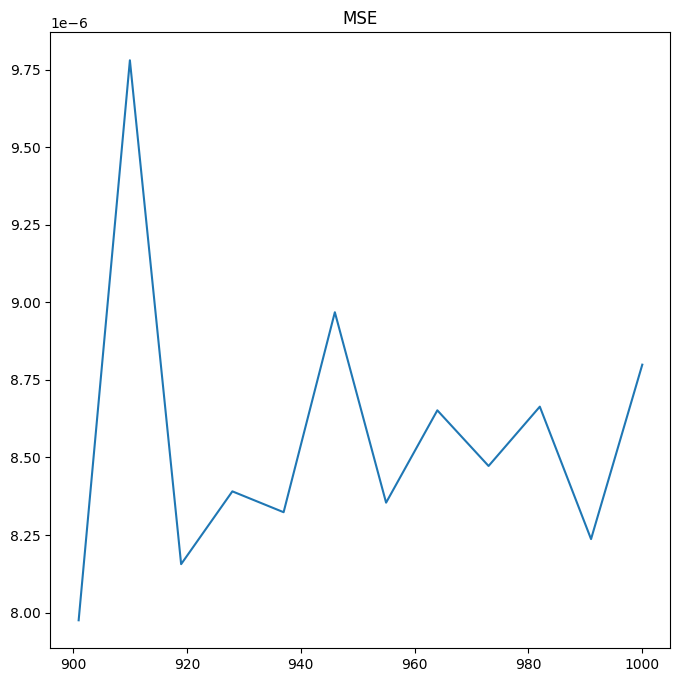

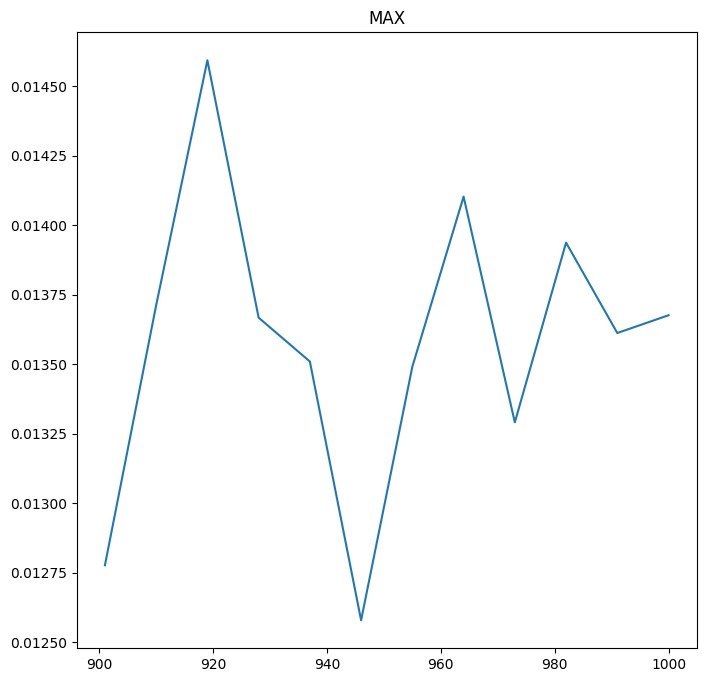

In [47]:
plotter = NNPlots(dg, (70, 70))

plotter.plot_error(existing_koefs, mse_loss_record, "MSE")
plotter.plot_error(existing_koefs, max_loss_record, "MAX")

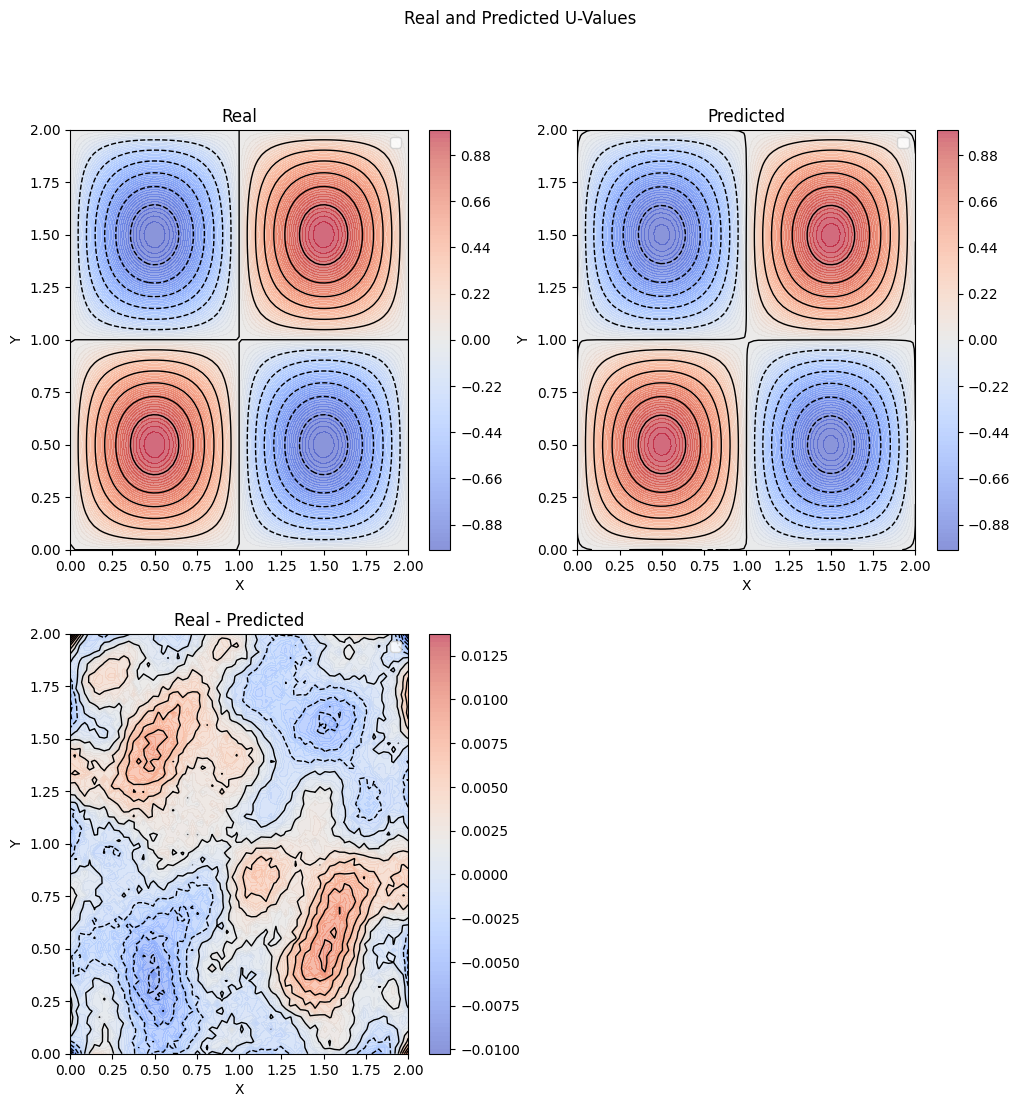

In [48]:
# plotter.plot2d_contour(color_map="gnuplot2")
plotter.plot2d_contour()